Steps to take:
1) Get the data ready
2) Building the model
3) Fitting the model
4) Making predictions annd evaluating the model
5) Save and load the model

In [ ]:
#Importing the libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.__version__

'1.12.1+cu113'

In [ ]:
#We start by creating the known parameters 
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
#Splitting the data into training and testing 
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train),len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
#Visualize the data 
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4, label = "Training Data")
  plt.scatter(test_data, test_labels, c="g",s=4, label = "Test Data")
  if predictions is not None:
    plt.scatter(test_data,predictions, c="r", s=4, label= "Predictions")
  plt.legend(prop={"size":14});

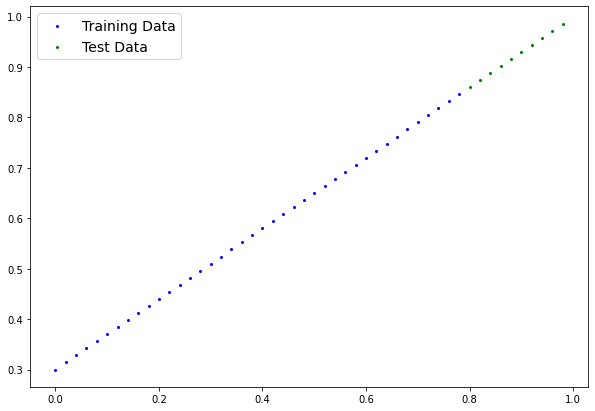

In [ ]:
plot_predictions()

In [ ]:
#Creating the linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor):
    return self.weight*x+ self.bias

In [ ]:
#To see what is inside the model we use a manual seed
torch.manual_seed(42)
#Making an instance of the model
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#We now make some predictions using the untrained model
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
#Lets see the actual labels
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
#Now we setup the training process for better results
#We start by initialising the loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
#Now the training loop
#Loop through the data
#Forward pass
#Calculate the loss
#Optimizer zero grad
#Backward propagation
#Optimizer step
torch.manual_seed(42)
epochs=200
epoch_count = []
train_loss = []
test_loss = []

for epoch in range(epochs):
  model_0.train()
  y_pred=model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()

  with torch.inference_mode():
    y_test_preds = model_0(X_test)
    test_loss_val= loss_fn(y_test_preds, y_test)

  test_loss.append(test_loss_val)
  train_loss.append(loss)
  epoch_count.append(epoch)

  print(f"Epoch: {epoch+1} / Train Loss : {loss} / Test Loss: {test_loss_val}")

Epoch: 1 / Train Loss : 0.2783183455467224 / Test Loss: 0.44065219163894653
Epoch: 2 / Train Loss : 0.26679736375808716 / Test Loss: 0.4271811842918396
Epoch: 3 / Train Loss : 0.2552763521671295 / Test Loss: 0.41371020674705505
Epoch: 4 / Train Loss : 0.24375534057617188 / Test Loss: 0.40023916959762573
Epoch: 5 / Train Loss : 0.23223432898521423 / Test Loss: 0.3867681920528412
Epoch: 6 / Train Loss : 0.22071333229541779 / Test Loss: 0.37329721450805664
Epoch: 7 / Train Loss : 0.20919232070446014 / Test Loss: 0.3598262071609497
Epoch: 8 / Train Loss : 0.1976713240146637 / Test Loss: 0.3463551998138428
Epoch: 9 / Train Loss : 0.18615034222602844 / Test Loss: 0.3328842222690582
Epoch: 10 / Train Loss : 0.1746293306350708 / Test Loss: 0.3194132149219513
Epoch: 11 / Train Loss : 0.16310831904411316 / Test Loss: 0.30594223737716675
Epoch: 12 / Train Loss : 0.1515873372554779 / Test Loss: 0.2924712300300598
Epoch: 13 / Train Loss : 0.14006635546684265 / Test Loss: 0.27900025248527527
Epoch: 

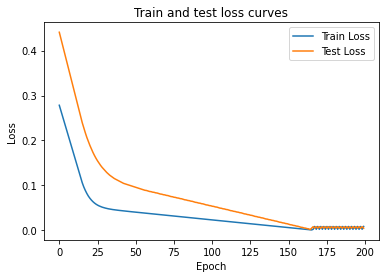

In [ ]:
#now we change the tensor to numpy and plot the loss curve
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(train_loss).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss, label = "Test Loss")
plt.title("Train and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

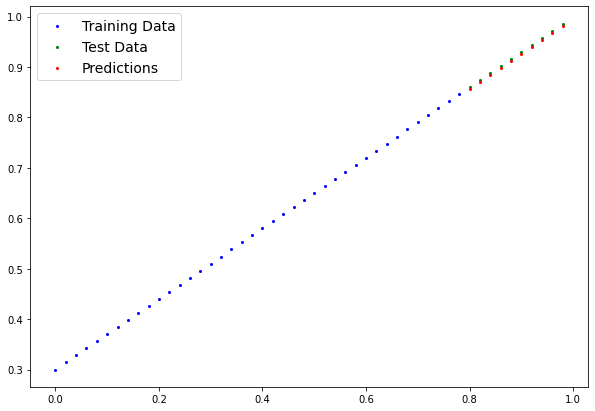

In [ ]:
#Now we plot the predictions
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

In [ ]:
#Now we save the model
from pathlib import Path
#Create the model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
#Create the model save path
MODEL_NAME = "01_Pytorch_Workflow_Model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

In [ ]:
#Saving the model
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)
print(f'Saved at {MODEL_SAVE_PATH}')

Saved at models/01_Pytorch_Workflow_Model_0.pth


In [ ]:
#Loading the model
#Create a new instance of the model and update the parameters
model_1 = LinearRegressionModel()
model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

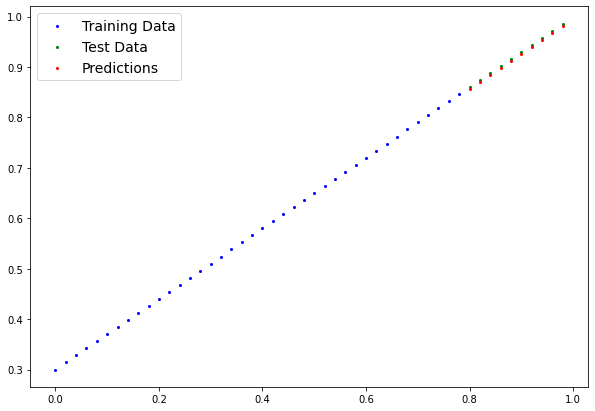

In [ ]:
#Making predictions with the loaded model
model_1.eval()
with torch.inference_mode():
  preds = model_1(X_test)
plot_predictions(predictions=preds)